In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json

<font size="4"> Antes de iniciar este análisis exploratorio de datos (EDA) lo primero que debemos hacer es conectarnos a la API de donde sacaremos todos los datos, en este caso nos conectaremos a la página web del *Ente Nacional de Comunicaciones* (ENACOM) quién es un ente público de Argentina.</font>

<font size="4">El ENACOM regula el espectro y garantiza el acceso a servicios públicos esenciales de TIC y Telecomunicaciones, tiene como objetivo la pluralidad de voces, el federalismo, la inclusión y la libertad de expresión en todo el país.</font>

In [3]:
API_KEY ='l5x9hIoqBBUmB9QgiwiYj6YaK2y5GxXQvS8UPmDN'

url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datasets.json/?auth_key={API_KEY}'

response = requests.get(url)

if response.status_code == 200:
    data = json.loads(response.content)
    print(data[6])
else:
    print('Error al obtener los datos de la API')

{'result': None, 'status': None, 'endpoint': 'file://15121/43161/44284949664329718784034050929648151938', 'description': 'Fondos destinados, adjudicados y pagados en programas de servicio universal', 'parameters': [], 'tags': [], 'last_revision_id': None, 'timestamp': 1687367131000, 'created_at': 1687367119, 'title': 'Fondos de servicio universal', 'modified_at': 1687367131, 'category_id': '83830', 'methods': None, 'sources': [], 'total_revisions': None, 'frequency': 'monthly', 'link': 'http://datosabiertos.enacom.gob.ar/datasets/196337/fondos-de-servicio-universal/', 'user': 'asrozada', 'status_str': None, 'guid': 'FONDO-DE-SERVI-UNIVE', 'category_name': 'Servicio Universal'}


<font size="4"> Una vez conectados a la API por medio de una clave accedemos a los metadatos de cada DataFrame extrayendo la descripción, el identificador del recurso (guid) y el título.</font>

In [4]:
response = requests.get(url)

a = 1
for i in response.json():
    print(f"{a})")
    print(i['description'])
    print(i['guid'])
    print(i['title'])
    print('')
    a+=1

1)
Accesos, llamadas, minutos, SMS, ingresos y penetración del servicio
TELEF-MOVIL
Telefonía móvil

2)
Correos Privados + Correo Oficial - Ventas y Unidades por Provincia - Personal Ocupado (Trimestral)
A-8-INGRE-DE-FONDO
Mercado Postal - Ventas y Unidades por Provincia - Personal Ocupado

3)
Correos Privados + Correo Oficial - Ventas de Servicios Postales (Trimestral)
MERCA-POSTA-VENTA-DE-SERVI
Mercado Postal - Ventas de Servicios Postales

4)
Correos Privados + Correo Oficial - Unidades de Servicios Postales (Trimestral)
MERCA-POSTA-UNIDA-DE-SERVI
Mercado Postal - Unidades de Servicios Postales

5)
Listado de radioaficionados activos
LISTA-DE-RADIO
Listado de Radioaficionados

6)
Estadísticas mensuales sobre denuncias y reclamos recibidos por las delegaciones de Enacom
DENUN-Y-RECLA-12878
Denuncias y reclamos

7)
Fondos destinados, adjudicados y pagados en programas de servicio universal
FONDO-DE-SERVI-UNIVE
Fondos de servicio universal

8)
Cantidad de proyectos adjudicados por año 

<font size="4">Por lo que puedes observar son muchos datos los que se encuentran allí, en este caso solo nos quedaremos con los datos más importantes para nuestro análisis </font>

In [5]:
lista =  11,  13,  15,  16,  17,  18,  19,  20,  21,  22,  40

In [6]:
a = 1
for i in response.json(): 
    if a in lista:
        print(f"{a})")
        print(i['description'])
        print(i['guid'])
        print(i['title'])
        print('')
    a+=1

11)
Mapa geolocalizado de las distintas tecnologías disponibles para el acceso a Internet fijo y móvil
CONEC-AL-SERVI-DE-INTER
Conectividad al servicio de Internet

13)
Penetración del servicio de Internet fijo por métrica de población y métrica de hogares
PENET-DEL-SERVI-DE-INTER
Penetración del servicio de Internet fijo

15)
Número de accesos al servicio de Internet fijo por tecnología  en cada localidad declarada Categoría
ACCES-A-INTER-FIJO-46973
Accesos a Internet fijo por tecnología y localidad

16)
Número de accesos al servicio de Internet fijo por velocidad de bajada en cada localidad declarada
ACCES-A-INTER-FIJO-86398
Accesos a Internet fijo por velocidad de bajada y localidad

17)
Serie histórica de la velocidad media de bajada de Internet por provincia y nacional (trimestral)
VELOC-PROME-DE-BAJAD-DE
Velocidad Media de bajada de Internet por provincia y nacional

18)
Número de accesos al servicio de Internet fijo por banda ancha y angosta en cada provincia
ACCES-A-INTER-FIJO-


<font size="4">Habiendo definido los datos que queremos extraer llamamos a cada uno por medio de la API y los cargamos como DataFrames.</font>


In [7]:
guid = 'CONEC-AL-SERVI-DE-INTER' #11
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

url

'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/CONEC-AL-SERVI-DE-INTER/data.csv/?auth_key=l5x9hIoqBBUmB9QgiwiYj6YaK2y5GxXQvS8UPmDN'

In [8]:
df_map_tecnologias = pd.read_csv(url)

In [9]:
df_map_tecnologias.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [10]:
guid = 'PENET-DEL-INTER-FIJO-51614'#13
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [11]:
df_acc_hogares = pd.read_csv(url)

In [12]:
df_acc_hogares .head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [13]:
guid = 'ACCES-A-INTER-FIJO-46973'#15
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.json/?auth_key={API_KEY}'

In [14]:
url

'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-46973/data.json/?auth_key=l5x9hIoqBBUmB9QgiwiYj6YaK2y5GxXQvS8UPmDN'

In [15]:
guid = 'ACCES-A-INTER-FIJO-16249'#16
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [16]:
df_acc_velocidad_localidad = pd.read_csv(url)

In [17]:
df_acc_velocidad_localidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
guid = 'VELOC-PROME-DE-BAJAD-51733'#17
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [19]:
df_speed_media_pais = pd.read_csv(url)

In [20]:
df_speed_media_pais.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [21]:
guid = 'BANDA-ANCHA-Y-BANDA-ANGOS'#18
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [22]:
df_banda = pd.read_csv(url)

In [23]:
df_banda.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


In [24]:
guid = 'TOTAL-NACIO-DE-ACCES-A'#19
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [25]:
df_acc_tecnologia = pd.read_csv(url, dtype={'Wireless': str, 'Otros': str})

In [26]:
df_acc_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [27]:
guid = 'ACCES-A-INTER-FIJO-23248'#20
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [28]:
df_rangos_velocidad_provincia = pd.read_csv(url, dtype={'HASTA 512 kbps': str,
                                                         '+ 512 Kbps - 1 Mbps': str,
                                                         '+ 1 Mbps - 6 Mbps': str,
                                                         '+ 6 Mbps - 10 Mbps': str,
                                                         '+ 10 Mbps - 20 Mbps': str,
                                                         '+ 20 Mbps - 30 Mbps': str,
                                                         '+ 30 Mbps': str,
                                                         'OTROS': str})

In [29]:
df_rangos_velocidad_provincia.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71,384,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461,987,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [30]:
guid = 'ACCES-A-INTER-FIJO-97624'#21
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [31]:
df_acc_velocidad_prov = url

In [32]:
guid = 'INGRE-POR-LA-OPERA-DEL'#22
url = f'http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/{guid}/data.csv/?auth_key={API_KEY}'

In [33]:
df_ingreso_operadores = pd.read_csv(url)

In [34]:
df_ingreso_operadores.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


<font size="4">Debido a la gran cantidad de datos obtenidos es necesario quedarnos solo con aquellos DataFrames que desde mi punto de vista incluyen la información más relevante para la realización del EDA. </font>

In [35]:
# 7   Conectividad al servicio: Mapa geolocalizado de las distintas tecnologías disponibles para el acceso a Internet fijo y móvil

# 13  Penetración del servicio de Internet fijo por métrica de hogares (por Provincia)

# 17  Serie histórica de la velocidad media de bajada de Internet por provincia y nacional (trimestral)

# 18  Acceso a Internet fijo: banda ancha y banda angosta (por Provincia)

# 19  Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia

# 20  Accesos a Internet fijo por rangos de velocidad bajada  y provincia

# 22  Ingresos trimestrales de los operadores por el servicio de Internet fijo

In [36]:
df_acc_hogares['Accesos por cada 100 hogares'] = df_acc_hogares['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)

In [37]:
df_acc_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [38]:
# Funcióm para cambiar el dato en la columna 'Trimestre'

def funcion(numero):
    if numero == '1':
        return '3'
        
    elif numero == '2':
        return '6'
        
    elif numero == '3':
        return '9'
        
    elif numero == '4':
        
        return '12'

<font size="4">El siguiente Gráfico muestra las 5 provincias que han tenido mejores números de accesibilidad a lo largo del tiempo.</font>

C:\Users\Marlon\AppData\Local\Temp\ipykernel_6304\1629607698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top4['Fecha'] = pd.to_datetime(df_top4['Año'].astype(str) + '-' + df_top4['Trimestre'].astype(str).apply(funcion) + '-30')


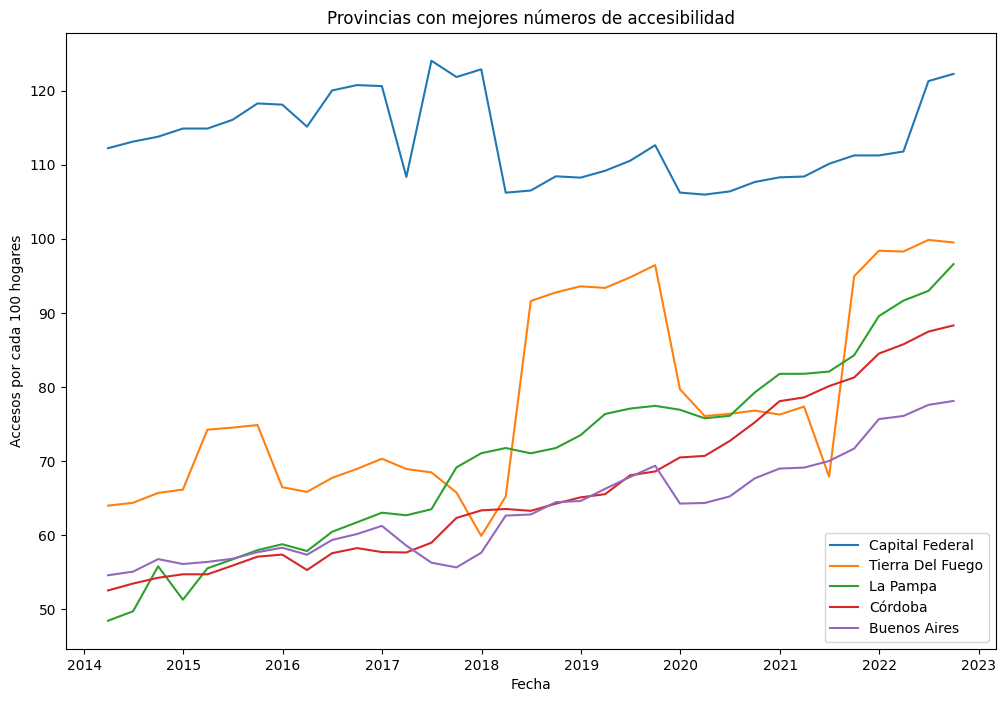

In [64]:
# Fitro de las 4 provincias con mejores números de accesibilidad
provincias_top4 = df_acc_hogares.groupby('Provincia')['Accesos por cada 100 hogares'].mean().nlargest(5).index

#provincias_top4 = provincias_top4[1:]
df_top4 = df_acc_hogares[df_acc_hogares['Provincia'].isin(provincias_top4)]

# Creamos una columna "Fecha" basada en el trimestre
df_top4['Fecha'] = pd.to_datetime(df_top4['Año'].astype(str) + '-' + df_top4['Trimestre'].astype(str).apply(funcion) + '-30')

#Gráfico de líneas para cada provincia
fig, ax = plt.subplots(figsize=(12, 8))

for provincia in provincias_top4:
    df_provincia = df_top4[df_top4['Provincia'] == provincia]
    ax.plot(df_provincia['Fecha'], df_provincia['Accesos por cada 100 hogares'], label=provincia)

#Etiquetas
ax.set_xlabel('Fecha')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Provincias con mejores números de accesibilidad')
ax.legend()

#plt.ylim(40)

plt.show()

<font size="4">El gráfico anterior muestra las 5 provincias con un crecimiento sostenido en el tiempo respecto a accesos por cada 100 hogares, la provincia con más accesos históricamente ha sido la Capital Federal, su promedio para el tercer trimestre de 2022 supera los 120 accesos por cada 100 hogares, por la cantidad de habitantes de esta ciudad y a los servicios de telecomunicaciones de diversas organizaciones, haciendo que la media  sea superior a 100. La provincia Tierra Del Fuego presenta algo de variabilidad en sus cifras a lo largo del tiempo, esto puede deberse al tamaño de su población y otras causas externas. Las provincias de La Pampa, Córdoba y Buenos Aires presentan un crecimiento sostenido de sus cifras, por lo general el acceso por hogares en el país tiende a amentar cada año. </font>

In [40]:
df_velocidad_media = pd.read_csv("Datasets_original/Velocidad_media_provincia (17).csv")

In [41]:
df_velocidad_media['Mbps (Media de bajada)'] = df_velocidad_media['Mbps (Media de bajada)'].str.replace(',', '.').astype(float)

In [42]:
df_velocidad_media.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70.19
1,2022,3,Capital Federal,101.05
2,2022,3,Catamarca,60.99
3,2022,3,Chaco,53.21
4,2022,3,Chubut,15.57


C:\Users\Marlon\AppData\Local\Temp\ipykernel_6304\2240561347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Fecha'] = pd.to_datetime(df_top5['Año'].astype(str) + '-' + df_top5['Trimestre'].astype(str).apply(funcion) + '-30')


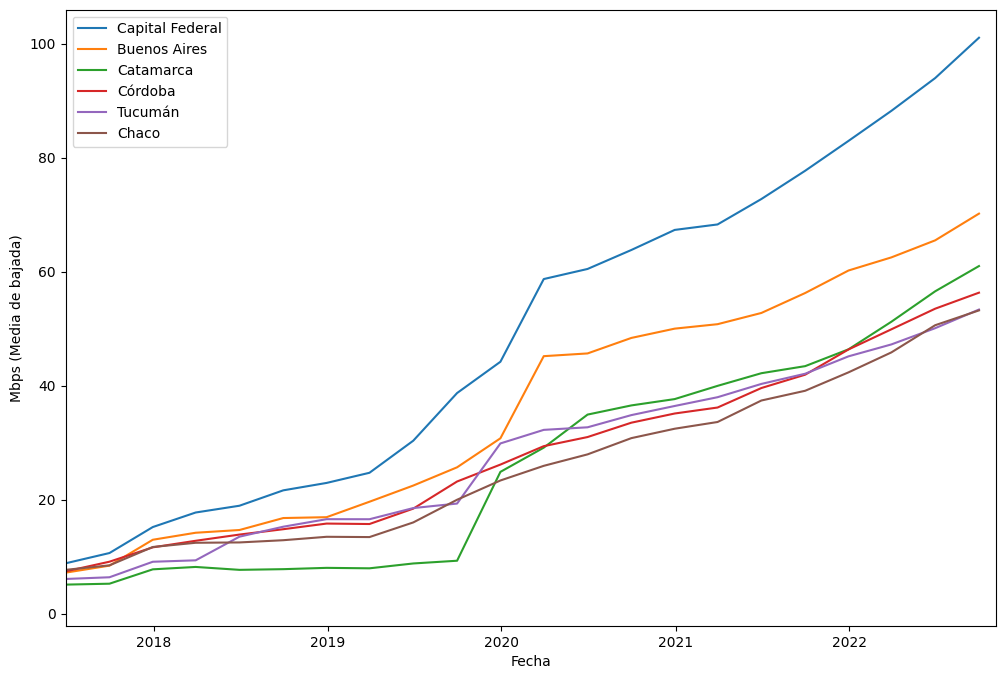

In [65]:
# Fitro de las 5 provincias con mejores velocidades
provincias_top5 = df_velocidad_media.groupby('Provincia')['Mbps (Media de bajada)'].max().nlargest(6).index
df_top5 = df_velocidad_media[df_velocidad_media['Provincia'].isin(provincias_top5)]

# Creamos una columna "Fecha" basada en el trimestre
df_top5['Fecha'] = pd.to_datetime(df_top5['Año'].astype(str) + '-' + df_top5['Trimestre'].astype(str).apply(funcion) + '-30')

#Gráfico de líneas para cada provincia
fig, ax = plt.subplots(figsize=(12, 8))

for provincia in provincias_top5:
    df_provincia = df_top5[df_top5['Provincia'] == provincia]
    ax.plot(df_provincia['Fecha'], df_provincia['Mbps (Media de bajada)'], label=provincia)

#Etiquetas
ax.set_xlabel('Fecha')
ax.set_ylabel('Mbps (Media de bajada)')
ax.set_title('Provincias con mejores velocidades de bajada')
ax.legend()

# Ajustes en el rango del eje x y el eje y
plt.xlim(df_provincia['Fecha'][507], 19300)

plt.show()

<font size="4">En el anterior gráfico se muestran las 5 provincias con mayor media de bajada hasta la fecha, lo que concluye que históricamente la capital ha tenido las mejores velocidades y que las velocidades en el resto de las provincias aumentan con los años, esto indica que las personas tienden a contratar mejores planes, dándonos una visión de cómo mejorar los servicios prestados, aumentando la tasa de retención de clientes y con ello las ganancias. </font>

In [44]:
# Aplicación de transformaciones correspondientes

df_banda['Total'] = df_banda['Total'].str.replace('.', '').astype(float)

df_banda['Banda ancha fija'] = df_banda['Banda ancha fija'].str.replace('.', '').astype(float)

df_banda['Dial up'] = df_banda['Dial up'].str.replace('- 0', '0')
df_banda['Dial up'] = df_banda['Dial up'].str.replace('.', '').astype(float)

In [45]:
df_banda.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4715469.0,6199.0,4721668.0
1,2022,3,Capital Federal,1545534.0,2145.0,1547679.0
2,2022,3,Catamarca,70292.0,1.0,70293.0
3,2022,3,Chaco,144141.0,5.0,144146.0
4,2022,3,Chubut,164874.0,904.0,165778.0


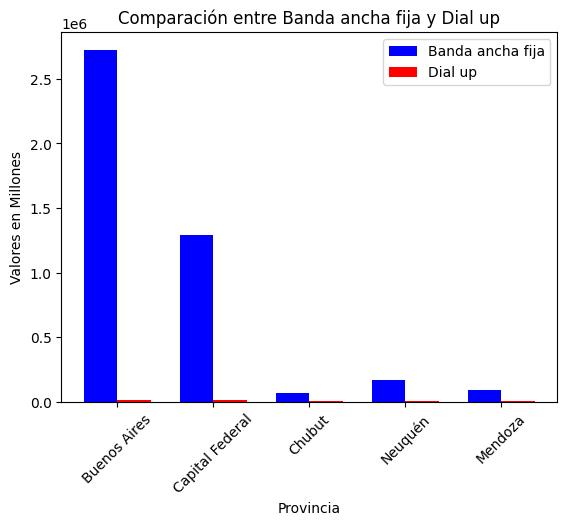

In [46]:
# Filtro de las 5 provincias por tipo de conexión. 

provincias_top5 = df_banda.groupby('Provincia')['Dial up'].max().nlargest(5).index
df_top5 = df_banda[df_banda['Provincia'].isin(provincias_top5)]
banda_ancha = df_top5['Banda ancha fija'].tail(5)
dial_up = df_banda.groupby('Provincia')['Dial up'].max().nlargest(5).values
provincia = provincias_top5.to_list()

# Crear un array de posiciones para las barras
x = np.arange(len(provincia))

# Ancho de las barras
bar_width = 0.35

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras para Banda ancha fija
rects1 = ax.bar(x, banda_ancha, bar_width, color='blue', label='Banda ancha fija')

# Graficar las barras para Dial up
rects2 = ax.bar(x + bar_width, dial_up, bar_width, color='red', label='Dial up')

# Agregamos etiquetas en el eje x
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(provincia, rotation=45)


ax.legend()

# Etiquetas de los ejes
ax.set_xlabel('Provincia')
ax.set_ylabel('Valores en Millones')

# Título
ax.set_title('Comparación entre Banda ancha fija y Dial up')


plt.show()

<font size="4">En el anterior gráfico se muestra la comparación entre banda ancha fija y Dial up, se hace evidente que la mayoría de las conexiones se hacen por banda ancha fija y que Dial up aporta poco más del 1% del total, esto es debido a que la velocidad de conexión con dial-up es muy lenta en comparación con otras formas de conexión a internet.  </font>

In [47]:
# Normalización de columnas numéricas

columnas =['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless','Otros','Total']

for i in columnas:
    df_acc_tecnologia[i] = df_acc_tecnologia[i].str.replace('.','')

In [48]:
for i in columnas:
    df_acc_tecnologia[i] = df_acc_tecnologia[i].astype(int)

In [49]:
df_acc_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
4,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021


c:\Users\Marlon\PI N° 2\Proyecto individual 2\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


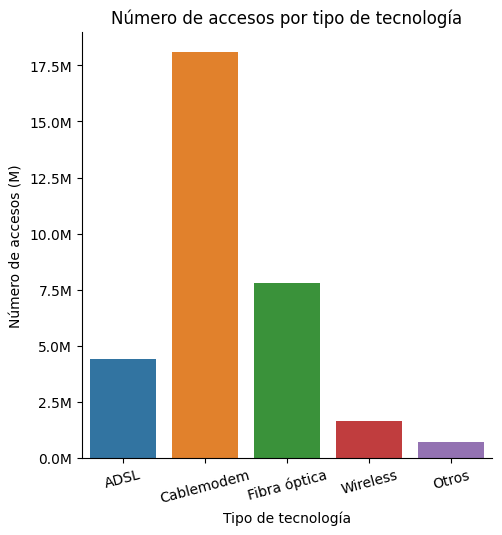

In [163]:
categorias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
valores = df_acc_tecnologia.groupby('Año').sum().iloc[8,1:6].tolist()

# Creamos un nuevo DataFrame utilizando las listas de categorías y valores
data = pd.DataFrame({'Tipo de tecnología': categorias, 'Valores': valores})

# Dividimos los valores por un millón para mostrarlos en millones
data['Número de accesos (M)'] = data['Valores'] / 1000000

# Se genera el Catplot utilizando la columna de Valores (M)
plot = sns.catplot(x='Tipo de tecnología', y='Número de accesos (M)', data=data, kind='bar')

plt.title('Número de accesos por tipo de tecnología')

# Creamos un objeto de formateo para mostrar los valores en millones
formatter = ticker.FuncFormatter(lambda x, pos: f'{x}M')

# Aplicamos el formateo a los ticks del eje y
plot.ax.yaxis.set_major_formatter(formatter)

plot.set_xticklabels(categorias, rotation=15)

plt.show()

<font size="4">En el anterior gráfico se muestra el número de accesos por tipo de tecnología, este gráfico varía según el año en que se configure, mostrando que tecnologías como ADSL han disminuido sus accesos con el tiempo, y tecnologías como Cablemódem y Fibra óptica han aumentado. Con lo anterior se deben mejorar la calidad de los servicios si queremos aumentar la fidelización de clientes y ampliar el rango de personas que pueden acceder a este tipo de tecnologías mejorando la infraestructura disponible. </font>

In [51]:
df_acc_tecnologia_prov = pd.read_csv("Datasets_original/Acc_tecnologia_prov (19).csv", dtype={'Wireless': str, 'Otros': str})

In [52]:
df_acc_tecnologia_prov = df_acc_tecnologia_prov[:840]

In [53]:
for i in columnas:
    df_acc_tecnologia_prov[i] = df_acc_tecnologia_prov[i].str.replace('.','')
    
for i in columnas:
    df_acc_tecnologia_prov[i] = df_acc_tecnologia_prov[i].astype(int)

In [54]:
df_acc_tecnologia_prov['Provincia'] = df_acc_tecnologia_prov['Provincia'].str.strip()

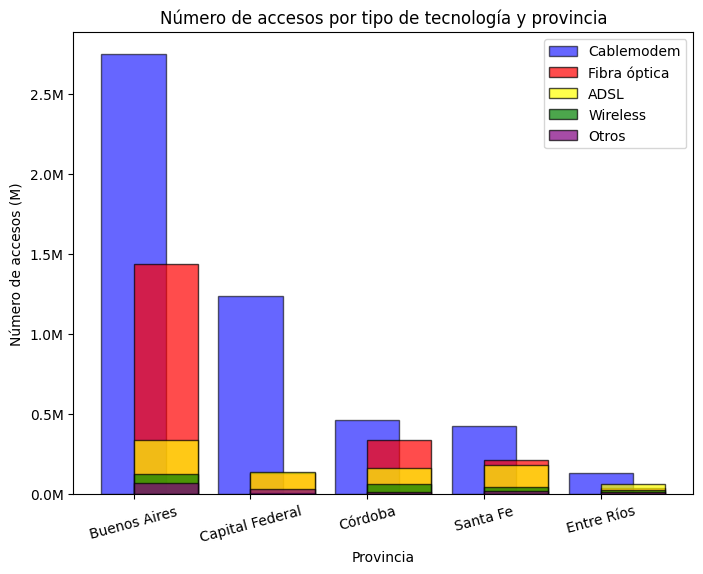

In [165]:
# Datos para los conjuntos de barras
x = df_acc_tecnologia_prov.groupby('Provincia')['Total'].mean().nlargest(5).index

df_top5 = df_acc_tecnologia_prov[df_acc_tecnologia_prov['Provincia'].isin(x)]

df_top5 = df_top5[['Provincia','Cablemodem','Fibra óptica','ADSL','Wireless','Otros']].head().sort_values(by=['Cablemodem'], ascending = False)

y1 = [i / 1000000 for i in df_top5['Cablemodem']]
y2 = [i / 1000000 for i in df_top5['Fibra óptica']]
y3 = [i / 1000000 for i in df_top5['ADSL']]
y4 = [i / 1000000 for i in df_top5['Wireless']]
y5 = [i / 1000000 for i in df_top5['Otros']]
                                          
# Creamos el gráfico de barras sobrepuesto
width = 0.55  # Ancho de las barras
offsets = np.linspace(-2 * width, 2 * width, 5)  # Desplazamientos

fig1 = plt.figure(figsize=(8, 6))

plt.bar(x, y1, width=width, color='blue', alpha=0.6, label='Cablemodem', align='center', edgecolor='black')
plt.bar(x, y2, width=width, color='red', alpha=0.7, label='Fibra óptica', align='edge', edgecolor='black')
plt.bar(x, y3, width=width, color='yellow', alpha=0.7, label='ADSL', align='edge', edgecolor='black')
plt.bar(x, y4, width=width, color='green', alpha=0.7, label='Wireless', align='edge', edgecolor='black')
plt.bar(x, y5, width=width, color='purple', alpha=0.7, label='Otros', align='edge', edgecolor='black')

# Añadimos etiquetas y título al gráfico
plt.xlabel('Provincia')
plt.ylabel('Número de accesos (M)')
plt.title('Número de accesos por tipo de tecnología y provincia')

plt.xticks(rotation=15)

formatter = ticker.FuncFormatter(lambda x, pos: f'{round(x,1)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()

plt.show()

<font size="4">En el anterior gráfico se muestra cómo se distribuye la tecnología en cada provincia, con datos del tercer trimestre del 2022, nuevamente podemos decir que tecnologías como Cablemódem y Fibra óptica aumentaron su número de accesos, esta vez tenemos organizados los datos por las provincias con mayores accesos, lo que indica que son las provincias con mayor tasa de acceso por habitantes, ya que tienen la mayoría de la población del país. </font>

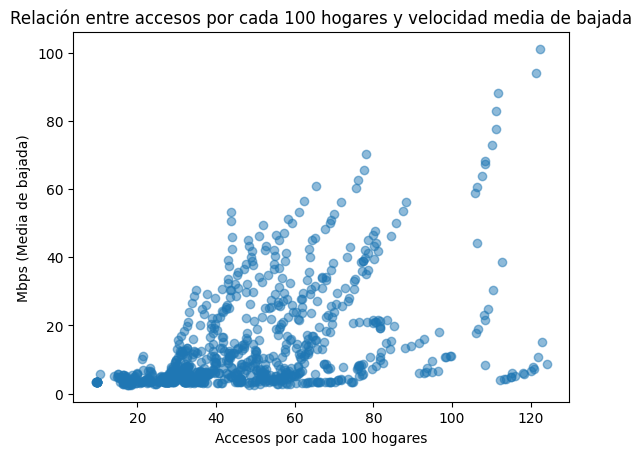

In [171]:
fig, ax = plt.subplots()
plt.scatter(df_acc_hogares['Accesos por cada 100 hogares'], df_velocidad_media['Mbps (Media de bajada)'], alpha=0.5)

# Personalizar el scatter plot
plt.title("Relación entre accesos por cada 100 hogares y velocidad media de bajada")
plt.xlabel("Accesos por cada 100 hogares")
plt.ylabel("Mbps (Media de bajada)")

plt.show()

In [57]:
#Normalización del 'df_acc_tecnologia_prov'

columnas = ['Año','Trimestre']

for i in columnas:
    df_acc_tecnologia_prov[i] = df_acc_tecnologia_prov[i].str.replace('*','')
    
for i in columnas:
    df_acc_tecnologia_prov[i] = df_acc_tecnologia_prov[i].astype(int)

In [58]:
#Creamos una columna 'fecha' de tipo datetime para los dataframes 'df_acc_tecnologia_prov' y 'df_velocidad_media'

df_acc_tecnologia_prov['fecha'] = df_acc_tecnologia_prov.apply(lambda row: pd.to_datetime(str(row['Año']) + 'Q' + str(row['Trimestre'])), axis=1)

df_velocidad_media['fecha'] = df_velocidad_media.apply(lambda row: pd.to_datetime(str(row['Año']) + 'Q' + str(row['Trimestre'])), axis=1)

In [59]:
df_acc_tecnologia_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,fecha
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,2022-07-01
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,2022-07-01
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293,2022-07-01
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146,2022-07-01
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778,2022-07-01


In [60]:
df_velocidad_media.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),fecha
0,2022,3,Buenos Aires,70.19,2022-07-01
1,2022,3,Capital Federal,101.05,2022-07-01
2,2022,3,Catamarca,60.99,2022-07-01
3,2022,3,Chaco,53.21,2022-07-01
4,2022,3,Chubut,15.57,2022-07-01


In [174]:
# Creación de los datos
df_trimestral = df_acc_tecnologia_prov.groupby(pd.Grouper(key='fecha', freq='Q')).sum()
df_trimestral2 = df_velocidad_media.groupby(pd.Grouper(key='fecha', freq='Q')).mean()

año = df_trimestral.index
categoria1 = df_trimestral['Cablemodem']/1000000
categoria2 = df_trimestral['Fibra óptica']/1000000
categoria3 = df_trimestral2['Mbps (Media de bajada)']

# Figura y primer eje
fig, ax1 = plt.subplots()
ax1.plot(año, categoria1, color="blue", alpha=0.5, label="Cablemodem")
ax1.plot(año, categoria2, color="blue", label="Fibra óptica")
ax1.set_xlabel("Año")
ax1.set_ylabel("Suma de accesos de Tipo de tecnología", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

formatter = ticker.FuncFormatter(lambda x, pos: f'{round(x)}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Creamos el segundo eje que comparte el mismo eje x
ax2 = ax1.twinx()
ax2.plot(año, categoria3, color="green")
ax2.set_ylabel("Mbps (Media de bajada)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Agregamos leyendas al primer eje
ax1.legend()

# Mostrar gráfica
plt.title("Relación entre tipo de tecnología y velocidad de bajada")
plt.show()


TypeError: Could not convert Buenos AiresCapital FederalCatamarcaChacoChubutCórdobaCorrientesEntre RíosFormosaJujuyLa PampaLa RiojaMendozaMisionesNeuquénRío NegroSaltaSan JuanSan LuisSanta CruzSanta FeSantiago Del EsteroTierra Del FuegoTucumán to numeric

In [181]:
df_velocidad_media

,Año,Trimestre,Provincia,Mbps (Media de bajada),fecha
0,2022,3,Buenos Aires,70.19,2022-07-01
1,2022,3,Capital Federal,101.05,2022-07-01
2,2022,3,Catamarca,60.99,2022-07-01
3,2022,3,Chaco,53.21,2022-07-01
4,2022,3,Chubut,15.57,2022-07-01
...,...,...,...,...,...
835,2014,1,Santa Cruz,3.32,2014-01-01
836,2014,1,Santa Fe,3.15,2014-01-01
837,2014,1,Santiago Del Estero,2.95,2014-01-01
838,2014,1,Tierra Del Fuego,3.45,2014-01-01


In [173]:
# Por último, exportamos los dataframes que se usarán en el dashboard a .csv

df_map_tecnologias.to_csv('Datasets/Map_tecnologias.csv', index=False)

df_acc_hogares.to_csv('Datasets/Acc_hogares.csv', index=False)

df_velocidad_media.to_csv('Datasets/Velocidad_media.csv', index=False)

df_banda.to_csv('Datasets/Tipo_banda.csv', index=False)

df_acc_tecnologia_prov.to_csv('Datasets/Acc_tecnologia_prov.csv', index=False)

df_acc_tecnologia.to_csv('Datasets/Acc_tecnologia.csv', index=False)

df_ingreso_operadores.to_csv('Datasets/Ingreso_operadores.csv', index=False)